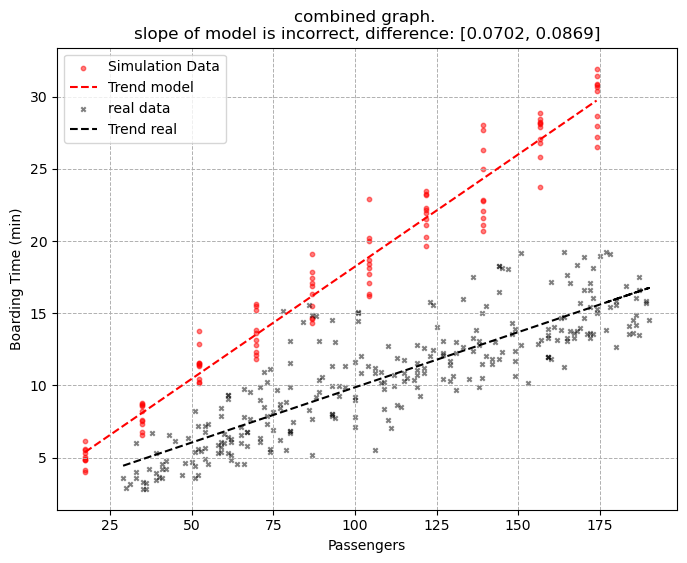

In [1]:
import pandas as pd

def check_model(df1, df2, n_iterations=10000):
    '''
    df1 = model data
    df2 = real boarding time data from literature 
    n_iterations = amount of bootstrap iterations 

    checks wether the model data and the literature data have the same slope and makes a graph of both dataframes 
    '''
    from scipy.stats import linregress
    import numpy as np
    import matplotlib.pyplot as plt

    def bootstrap_slopes(df, x_name, y_name , x_multiplyer = 1,  y_multiplyer= 1, n_iterations=1000):
        slopes = []
        for _ in range(n_iterations):
            sample = df.sample(frac=1, replace=True)
            slope, _, _, _, _ = linregress(sample[x_name] * x_multiplyer, sample[y_name] / y_multiplyer)
            slopes.append(slope)
        return np.array(slopes)

    #bootstrapping slope
    slopes_model = bootstrap_slopes(df1, "occupancy", "Time (s)", x_multiplyer = 174,  y_multiplyer= 60, n_iterations= n_iterations )
    slopes_real = bootstrap_slopes(df2, "people", "boarding time", n_iterations= n_iterations)

    #checking range of bootstrapped slopes
    difference = slopes_model - slopes_real
    lower, upper = np.percentile(difference, [2.5, 97.5])

    #making print for graph
    if lower <= 0 <= upper:
        slope = "slope of model is similar!"
    else:
        slope = f"slope of model is incorrect, difference: [{lower:.4f}, {upper:.4f}]"
    
    
    #--- plotting graphs
    grouped = results_df.groupby("occupancy")["Time (s)"].mean()
    passenger_counts = grouped.index * 174 

    #scatter model data
    plt.figure(figsize=(8, 6))
    plt.scatter(
        results_df["occupancy"] * 174,
        results_df["Time (s)"] / 60,
        color="red",
        alpha=0.5,
        label="Simulation Data",
        s=10,
    )

    #trendline model data
    trend = np.polyfit(results_df["occupancy"] * 174, results_df["Time (s)"] / 60, 1)
    trendline = np.polyval(trend, passenger_counts)
    plt.plot(passenger_counts, trendline, linestyle="--", color="red", label="Trend model")

    #scatter real data
    plt.scatter(
        compare_df["people"],
        compare_df["boarding time"] ,
        color="black",
        alpha=0.5,
        label="real data",
        s=10,
        marker="x",
    )
    
    #trendline real data
    trend = np.polyfit(compare_df["people"], compare_df["boarding time"] , 1)
    trendline = np.polyval(trend, compare_df["people"])
    plt.plot(compare_df["people"], trendline, linestyle="--", color="black", label="Trend real")

    #graph visuals
    plt.title(f"combined graph. \n{slope}")
    plt.xlabel("Passengers")
    plt.ylabel("Boarding Time (min)")
    plt.grid(True, linestyle="--", linewidth=0.7)
    plt.legend()
    plt.show()

compare_df = pd.read_csv("comparison_data/scatter_soure.csv")
results_df = pd.read_csv("results/batch_run_results.csv")
check_model(results_df, compare_df, n_iterations= 100)
    